# Load package

In [1]:
from sklearn.datasets import load_iris
from utils import *
data = load_iris()

2023-04-27 09:26:31.660319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 09:26:31.884218: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 09:26:31.884253: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 09:26:32.666858: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Load data

In [2]:
import pandas as pd
import numpy as np

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [3]:
data1 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
data1.shape[0]

150

In [5]:
# new_df = apply_random_missing_for_all(data1,10)
# 10 sample = 15 % percent of 150
perc = 0.1
new_df = randomly_missing(data1,perc)
n_sample = data1.shape[0] * perc

NameError: name 'randomly_missing' is not defined

In [ ]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,NaN,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
new_df.isna().sum()

sepal length (cm)    19
sepal width (cm)     16
petal length (cm)     8
petal width (cm)     11
target               18
dtype: int64

In [ ]:
n_df = apply_normalize(new_df)
n_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.969446,1.054593,-1.329454,-1.302297,-1.21106
1,-1.209972,-0.085048,-1.329454,-1.302297,-1.21106
2,-1.450498,0.370808,-1.385823,NaN,-1.21106
3,-1.570760,0.142880,-1.273084,-1.302297,-1.21106
4,-1.089709,1.282521,-1.329454,-1.302297,-1.21106
...,...,...,...,...,...
145,0.954758,-0.085048,0.812598,1.456342,NaN
146,0.473707,-1.224688,0.699859,0.930887,1.21106
147,0.714232,-0.085048,0.812598,1.062251,1.21106
148,0.353444,0.826665,0.925338,1.456342,1.21106


# grouth truth

<AxesSubplot: >

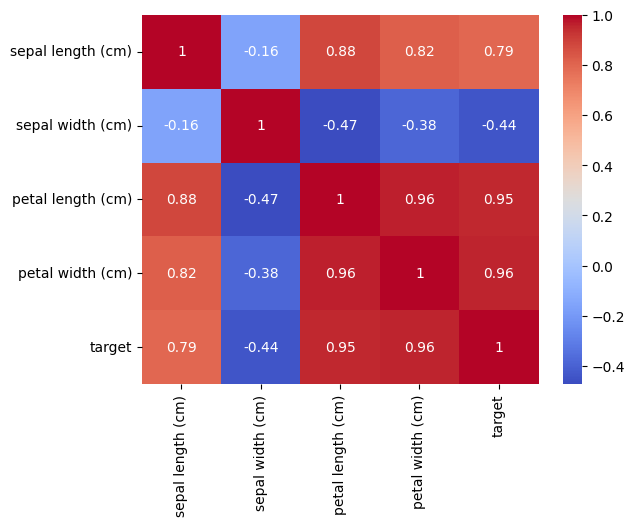

In [ ]:
import seaborn as sns
import pandas as pd

corr_matrix = n_df.corr() # grouth truth
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


<AxesSubplot: >

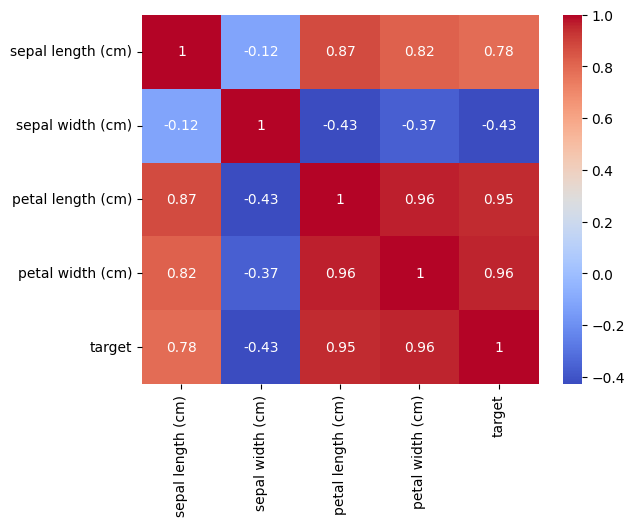

In [ ]:
import seaborn as sns
import pandas as pd

corr_matrix_gt = data1.corr() # grouth truth
sns.heatmap(corr_matrix_gt, cmap='coolwarm', annot=True)


# RMSE

| Giaỉ thuật    | RMSE  |
|---------------|-------|
|MICE           |0.0236 |
|MissForest     |0.0317 |
|ALS            |0.0588 |
|PCA            |0.0503 |
|KNN            |0.0409 |
|EM             |0.0503 |
|Mean           |0.0503 |
|Dpers          |0.3560 |
|GAIN           |0.0166 |
|GINN           |0.0492 |

# mice

In [ ]:
n_df_mice = impute_with_mice(n_df,10)

<AxesSubplot: >

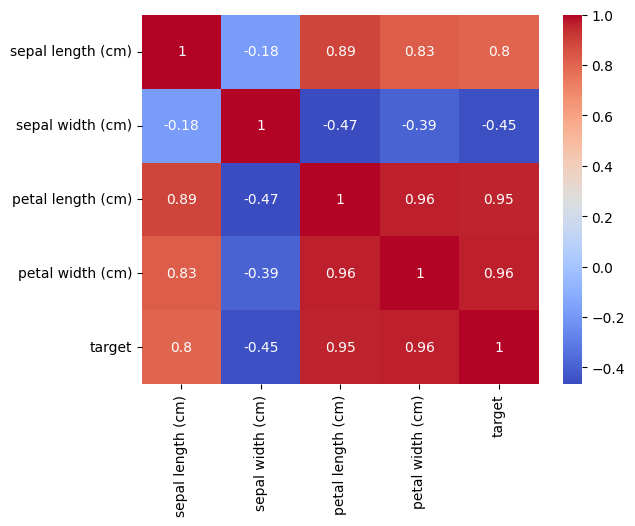

In [ ]:
corr_matrix_mice = n_df_mice.corr()
sns.heatmap(corr_matrix_mice, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_mice)


Total :  0.02361728124245472


0.02361728124245472

In [ ]:
dawdadawdasdw

NameError: name 'dawdadawdasdw' is not defined

# missforest

Iteration: 0
Iteration: 1
Iteration: 2


<AxesSubplot: >

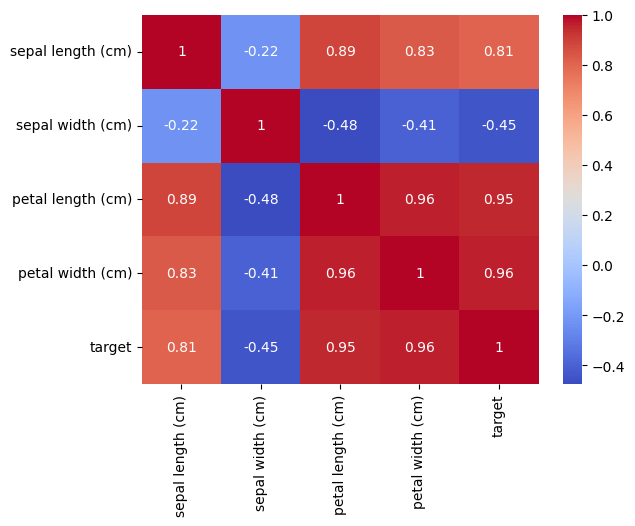

In [ ]:
n_df_missforest = impute_with_missforest(n_df,10)
corr_matrix_missforest = n_df_missforest.corr()
sns.heatmap(corr_matrix_missforest, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_missforest)

Total :  0.031788184289454756


sepal length (cm)    0.048911
sepal width (cm)     0.055063
petal length (cm)    0.022496
petal width (cm)     0.018287
target               0.014184
dtype: float64

# soft impute als

In [ ]:
n_df_softimpute = soft_impute_als_df(n_df)

[SoftImpute] Max Singular Value of X_init = 22.219136
[SoftImpute] Iter 1: observed MAE=0.028154 rank=5
[SoftImpute] Iter 2: observed MAE=0.028364 rank=5
[SoftImpute] Iter 3: observed MAE=0.028578 rank=5
[SoftImpute] Iter 4: observed MAE=0.028799 rank=5
[SoftImpute] Iter 5: observed MAE=0.029019 rank=5
[SoftImpute] Iter 6: observed MAE=0.029237 rank=5
[SoftImpute] Iter 7: observed MAE=0.029451 rank=5
[SoftImpute] Iter 8: observed MAE=0.029649 rank=5
[SoftImpute] Iter 9: observed MAE=0.029827 rank=5
[SoftImpute] Iter 10: observed MAE=0.029986 rank=5
[SoftImpute] Iter 11: observed MAE=0.030131 rank=5
[SoftImpute] Iter 12: observed MAE=0.030256 rank=5
[SoftImpute] Iter 13: observed MAE=0.030360 rank=5
[SoftImpute] Iter 14: observed MAE=0.030449 rank=5
[SoftImpute] Iter 15: observed MAE=0.030523 rank=5
[SoftImpute] Iter 16: observed MAE=0.030581 rank=5
[SoftImpute] Iter 17: observed MAE=0.030627 rank=5
[SoftImpute] Iter 18: observed MAE=0.030662 rank=5
[SoftImpute] Iter 19: observed MAE=0.

<AxesSubplot: >

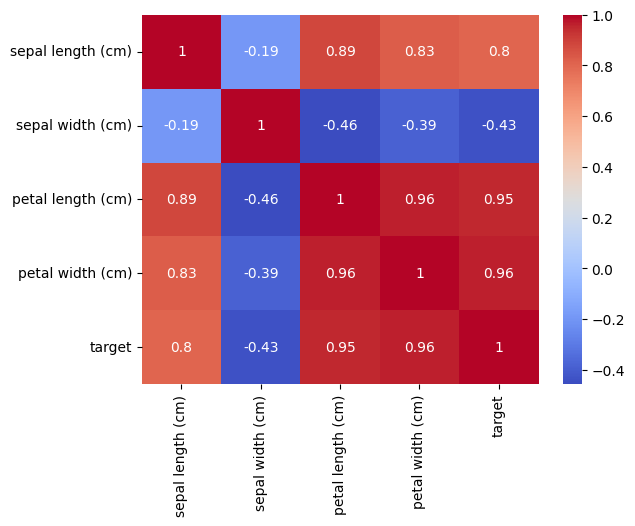

In [ ]:
corr_matrix_softimpute = n_df_softimpute.corr()
sns.heatmap(corr_matrix_softimpute, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_softimpute)

Total :  0.021149524814344275


sepal length (cm)    0.034489
sepal width (cm)     0.036302
petal length (cm)    0.014131
petal width (cm)     0.010634
target               0.010192
dtype: float64

# impute pca

Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold
Stopped after criterion < threshold


<AxesSubplot: >

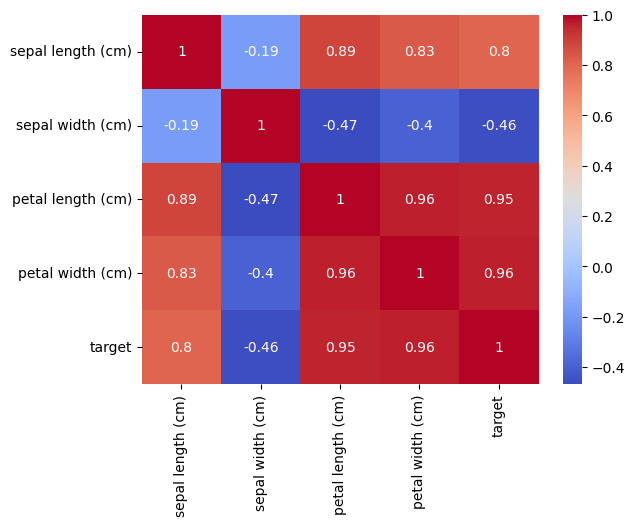

In [ ]:
n_df_imputepca = impute_with_pca(n_df)
corr_matrix_imputepca = n_df_imputepca.corr()
sns.heatmap(corr_matrix_imputepca, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_imputepca)

Total :  0.02519529817181155


sepal length (cm)    0.033369
sepal width (cm)     0.040240
petal length (cm)    0.019715
petal width (cm)     0.015481
target               0.017172
dtype: float64

# impute knn

<AxesSubplot: >

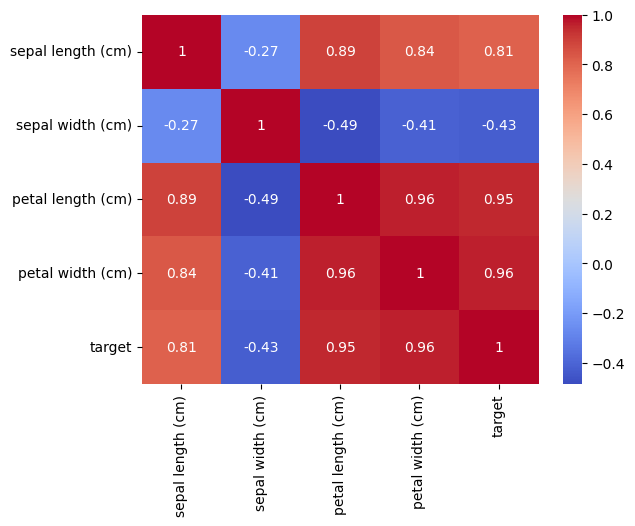

In [ ]:
n_df_knn = impute_with_knn(n_df)
corr_matrix_knn = n_df_knn.corr()
sns.heatmap(corr_matrix_knn, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_knn)

Total :  0.04090487676789922


sepal length (cm)    0.068561
sepal width (cm)     0.074033
petal length (cm)    0.027197
petal width (cm)     0.022197
target               0.012535
dtype: float64

In [ ]:
# def to_dper(X, y, G):
#     '''
#     X: input, should be a numpy array
#     y: label
#     G: number of classes
#     output:
#     - mus: each row is a class mean
#     - S: common covariance matrix of class 1,2,..., G
#     '''
#     epsilon = 1e-8  # define epsilon to put r down to 0 if r < epsilon
#     n, p = X.shape[0], X.shape[1]

#     mus = np.array(
#         [np.nanmean(X[y == g, :], axis = 0) for g in range(G)]).T  
#     # so that each column is the mean of a class

#     S = np.diag([diag_term(i, X, y, G) for i in range(p)])
   
#     upper_idx = list(zip(*np.triu_indices(p, 1)))

#     for (i, j) in tqdm(upper_idx): 
#     #for i in tqdm(range(p)):
#     #    for j in range(i):
#         if (S[i, i] != 0 and S[j, j] != 0): 
#             X_ij = X[:, [i, j]]

#             # drop rows with NA
#             idx = ~np.isnan(X_ij).any(axis = 1)
#             X_ij, y_arr = X_ij[idx], y[idx]

#             _, counts = np.unique(y_arr, return_counts = True)
#             ind = np.insert(np.cumsum(counts), 0, 0)

#             m_g = counts

#             A = len(y_arr)

#             scaled_X_ij = [X_ij[y_arr == g, :] - mus[[i, j], g] for g in range(G)]

#             q = lambda g: np.dot(scaled_X_ij[g][:, 0], scaled_X_ij[g][:, 0])
#             s11 = sum(map(q, range(G))) 
#             q = lambda g: np.dot(scaled_X_ij[g][:, 1], scaled_X_ij[g][:, 1])
#             s22 = sum(map(q, range(G)))  
#             d = lambda g: np.dot(scaled_X_ij[g][:, 0], scaled_X_ij[g][:, 1])
#             s12 = sum(map(d, range(G))) 
#             # print(f's11={s11}, s22={s22}, s12={s12}')
#             start_solve = time.time()
#             B = S[i, i] * S[j, j] * A - s22 * S[i, i] - s11 * S[j, j]
#             coefficient = [-A, s12, B, s12 * S[i, i] * S[j, j]] # ST wrong with coef [2] and [3]
#             # r = np.roots(coefficient)
#             if np.isnan(coefficient[2]) or np.isnan(coefficient[3]):
#                 r = np.array([np.nan])
#                 flag_check = True
#             else:
#                 flag_check = False
#                 r = np.roots(coefficient)

#             r = r[abs(np.imag(r)) < epsilon]
#             r = np.real(r)
#             r[abs(r) < epsilon] = 0

#             if len(r) > 1:
#                 condi_var = S[j, j] - r ** 2 / S[i, i]
#                 eta = -A * np.log(condi_var) - (S[j, j] - 2 * r / S[i, i] * s12 +
#                                                 r ** 2 / S[i, i] ** 2 * s11) / condi_var
#                 # if condi_var <0 then eta = NA. in practice, it's impossible for cov to be negative
#                 #  therefore, we drop NA elements of eta
#                 r = r[eta == max(eta[~np.isnan(eta)])]

#             if len(r) > 1:
#                 w = [m_g[g - 1] * np.cov(X_ij[ind[g - 1]:ind[g], ], rowvar = False) for
#                      g in range(1, G + 1)]
#                 w = np.sum(w, axis = 0)
#                 r = r[np.abs(r - w[0, 1]).argmin()]  # choose r that is w[0,1]

#             S[i, j] = S[j, i] = r
#             if flag_check:
#                 S[i, j] = S[j, i] = 0
#         else:
#             S[i, j] = S[j, i] = np.nan
#     return [mus, S]

In [ ]:
# mus, S = to_dper(n_df.iloc[:,:-1].to_numpy(),data1.iloc[:,-1],np.unique(data1.iloc[:,-1]).shape[0])

In [ ]:
# covariance_rmse(corr_matrix_gt.iloc[:-1,:-1], corr_matrix_dpers.iloc[:-1,:-1])

# EM

In [ ]:
n_df_EM = impute_with_EM(n_df)

100%|██████████| 100/100 [00:00<00:00, 302.54it/s]


<AxesSubplot: >

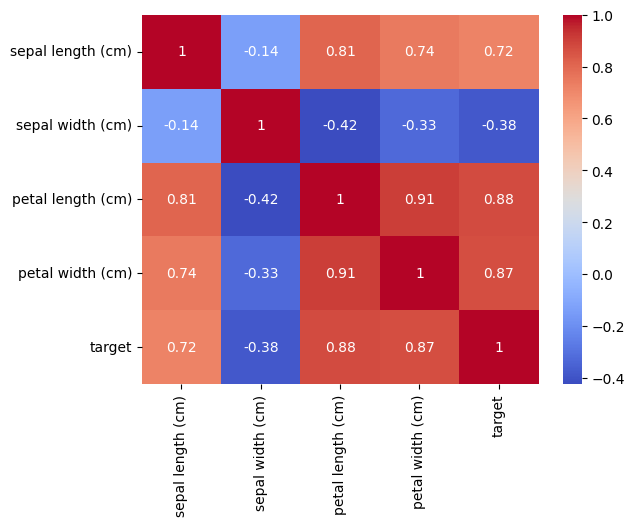

In [ ]:
corr_matrix_EM = n_df_EM.corr()
sns.heatmap(corr_matrix_EM,cmap = 'coolwarm',annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt,corr_matrix_EM)

Total :  0.050362317824574857


sepal length (cm)    0.053667
sepal width (cm)     0.026989
petal length (cm)    0.049650
petal width (cm)     0.059335
target               0.062172
dtype: float64

# mean impute

In [ ]:
n_df_meanImpute = impute_with_meanImpute(n_df)

<AxesSubplot: >

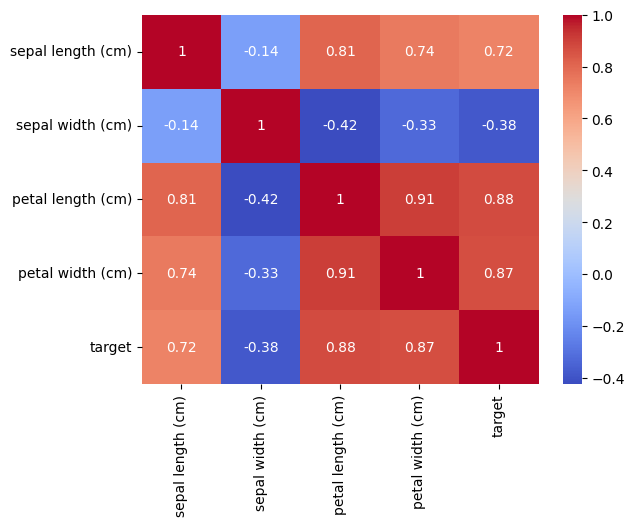

In [ ]:
corr_matrix_meanImpute = n_df_meanImpute.corr()
sns.heatmap(corr_matrix_meanImpute,cmap = 'coolwarm',annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt,corr_matrix_meanImpute)

Total :  0.050362317824574836


sepal length (cm)    0.053667
sepal width (cm)     0.026989
petal length (cm)    0.049650
petal width (cm)     0.059335
target               0.062172
dtype: float64

# dpers

In [ ]:
corr_dpers = dpers(n_df.to_numpy())
cols = [i for i in n_df.columns]
corr_matrix_dpers = pd.DataFrame(data=corr_dpers,columns=n_df.columns)
corr_matrix_dpers = corr_matrix_dpers.set_index(n_df.columns)

100%|██████████| 10/10 [00:00<00:00, 2110.34it/s]


<AxesSubplot: >

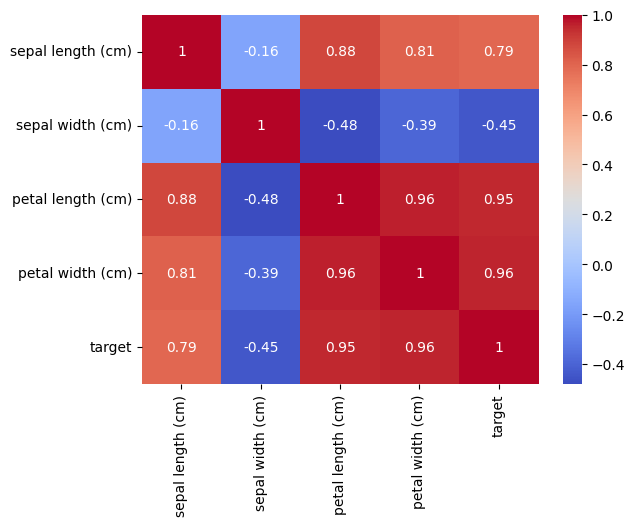

In [ ]:
# corr_matrix_dpers = corr_dpers.corr()
sns.heatmap(corr_matrix_dpers,cmap = 'coolwarm',annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt,corr_matrix_dpers)

Total :  0.02003033905652554


sepal length (cm)    0.020427
sepal width (cm)     0.033697
petal length (cm)    0.023605
petal width (cm)     0.012422
target               0.010001
dtype: float64

# gain

In [ ]:
n_df_gain, model = gain_impute(n_df, hint_probability=0.1, batch_size=128,epochs=20)

2023-04-15 21:10:27.187114: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-15 21:10:27.187137: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-15 21:10:27.187155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2023-04-15 21:10:27.188609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5/5 [==============================] - 0s 3ms/step


<AxesSubplot: >

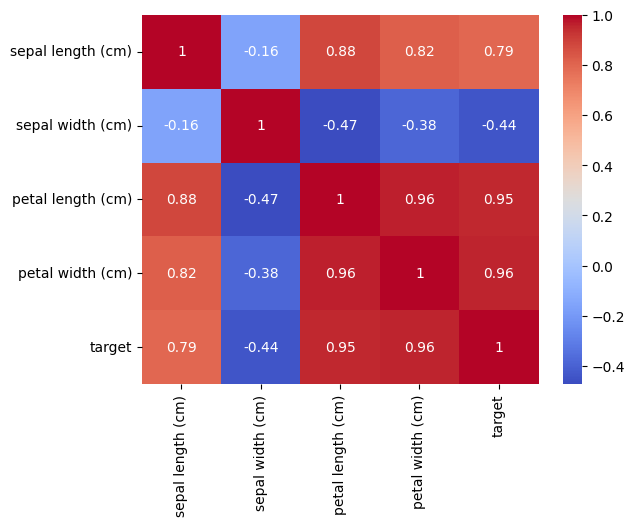

In [ ]:
corr_matrix_gain = n_df_gain.corr() 
sns.heatmap(corr_matrix_gain, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_gain)

Total :  0.01663529788982058


sepal length (cm)    0.019450
sepal width (cm)     0.028485
petal length (cm)    0.020383
petal width (cm)     0.006785
target               0.008073
dtype: float64

# ginn

In [ ]:
n_df_ginn = ginn_imputate(data1,perc) # because ginn need mask so using similar randomly_missing + mask so have in function
n_df_ginn = pd.DataFrame(data=n_df_ginn,columns=n_df.columns)

GINN is running on cpu


100%|██████████| 21/21 [00:00<00:00, 25.44it/s]


<AxesSubplot: >

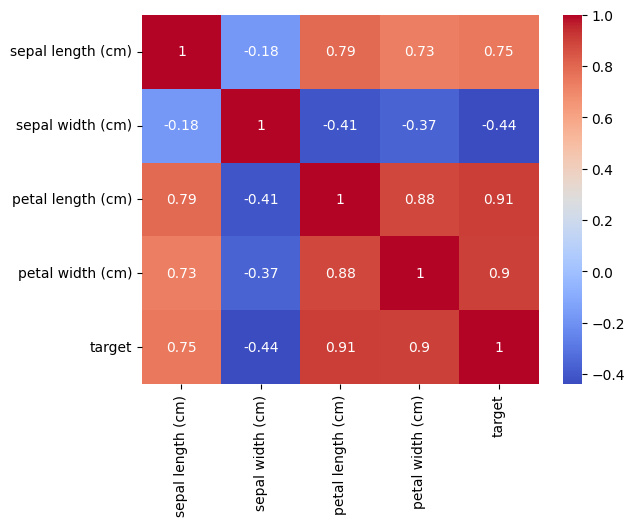

In [ ]:
corr_matrix_ginn = n_df_ginn.corr() # grouth truth
sns.heatmap(corr_matrix_ginn, cmap='coolwarm', annot=True)

In [ ]:
covariance_rmse(corr_matrix_gt, corr_matrix_ginn)

Total :  0.047383725881796394


sepal length (cm)    0.061046
sepal width (cm)     0.028657
petal length (cm)    0.054419
petal width (cm)     0.059086
target               0.033709
dtype: float64

# Viz

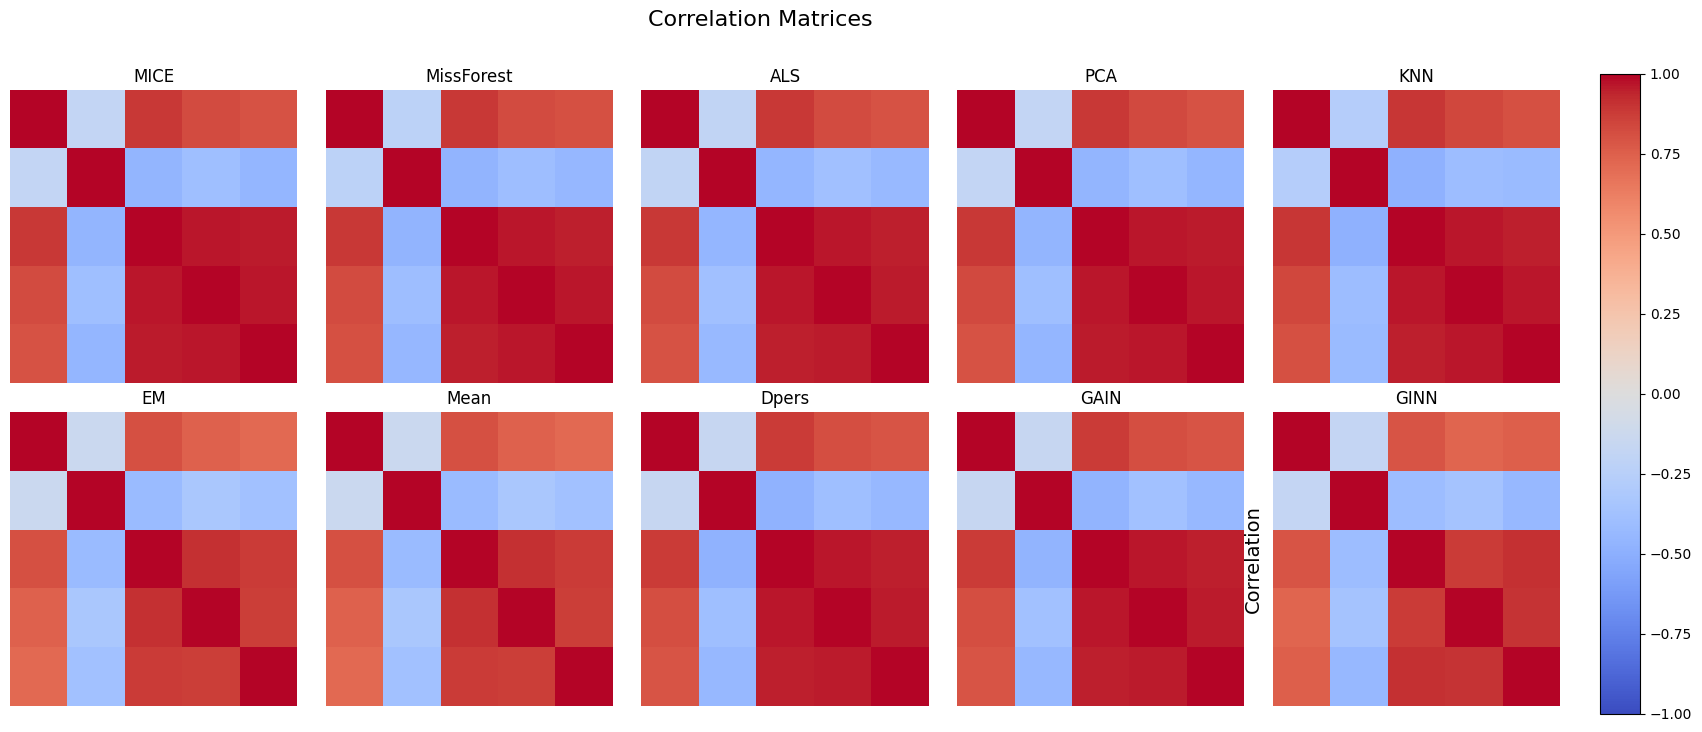

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=5,nrows=2, figsize=(20, 8))

matrix_total = [corr_matrix_mice, corr_matrix_missforest, corr_matrix_softimpute, corr_matrix_imputepca, corr_matrix_knn,
             corr_matrix_EM, corr_matrix_meanImpute, corr_matrix_dpers, corr_matrix_gain, corr_matrix_ginn]

row_title = ['MICE', 'MissForest', 'ALS', 'PCA', 'KNN',
             'EM', 'Mean', 'Dpers', 'GAIN', 'GINN']

# Plot each correlation matrix on the appropriate subplot
for i, matrix in enumerate(matrix_total):
    row = i // 5
    col = i % 5
    if col == 4:
        im = sns.heatmap(matrix, cmap='coolwarm', cbar=False, ax=axs[row, col], vmin=-1, vmax=1)
    else:
        im = sns.heatmap(matrix, cmap='coolwarm', cbar=False, ax=axs[row, col], vmin=-1, vmax=1)
    axs[row, col].set_title(f'{row_title[i]}')
    

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(im.get_children()[0], cax=cbar_ax)

# Set the label for the colorbar
axs[1, 4].set_ylabel('Correlation', fontsize=14)

# Add a title for the entire figure
fig.suptitle('Correlation Matrices', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Hide the ticks and labels on all subplots
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Show the figure
plt.savefig('iris_final.png',dpi=1200)
plt.show()


In [ ]:
sdawdadasdaw

In [ ]:
def impute_with_mice(**k):
    print(k['df'])

In [ ]:
Algo_impute = {
        'MICE': [impute_with_mice, dict(df=0,n_iterations=10)],
        # 'SoftImpute(ALS)': [soft_impute_als_df,()]
    }

In [ ]:
for name,params in Algo_impute.items():
    print(name, params[0](**params[1]))

0
MICE None


In [ ]:
import pandas as pd
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Dave'],
        'Age': [25, 32, 18, 47],
        'Gender': ['Female', 'Male', 'Other', 'Male'],
        'Salary': [50000, 70000, 30000, 90000]}

df = pd.DataFrame(data)

In [ ]:
from collections import defaultdict
all = defaultdict(list)
all['MICE'].append([0.001, df])
all['MICE2'].append([0.92, df])


In [ ]:
for i,each in enumerate(all):
    print(i, each)

0 MICE
1 MICE2


In [ ]:
defaultdict(<class 'list'>, 
{'MICE': [0.06274715694753796, 0.06013600842818266, 0.054858911798457644, 0.07186714380759346, 0.052661853452921854], 
'MissForest': [0.0608102790895061, 0.04689117116252394, 0.036948320937777494, 0.03658379961705664, 0.03667626517147212], 
'ALS': [0.06242432672168401, 0.05064806844566763, 0.04080973479829263, 0.0395124718944704, 0.035539520370463554], 
'PCA': [0.06159275837326011, 0.049323582757281804, 0.05440562945086616, 0.08422706753430262, 0.11407420176383339], 
'KNN': [0.06208303442805334, 0.04934216764048792, 0.04202200520193587, 0.04256803738847082, 0.042890105699610256], 
'EM': [0.07407085064819727, 0.07548813364017413, 0.08125097862816766, 0.09110368466442392, 0.09661737163587043], 
'MeanImpute': [0.07407085064819727, 0.07548813364017413, 0.08125097862816767, 0.09110368466442395, 0.09661737163587043], 
'Dpers': [0.06571103379822704, 0.05636700412778132, 0.04970184972778469, 0.05652390675788449, 0.06296335219689767], 
'GAIN': [0.06464617362151014, 0.05516974917185815, 0.047079365209201626, 0.046013613558542374, 0.04417303221091847], 
'GINN': [0.025625275227972876, 0.043693376926732745, 0.06204321877476836, 0.08188046975106035, 0.09674509524841306]})

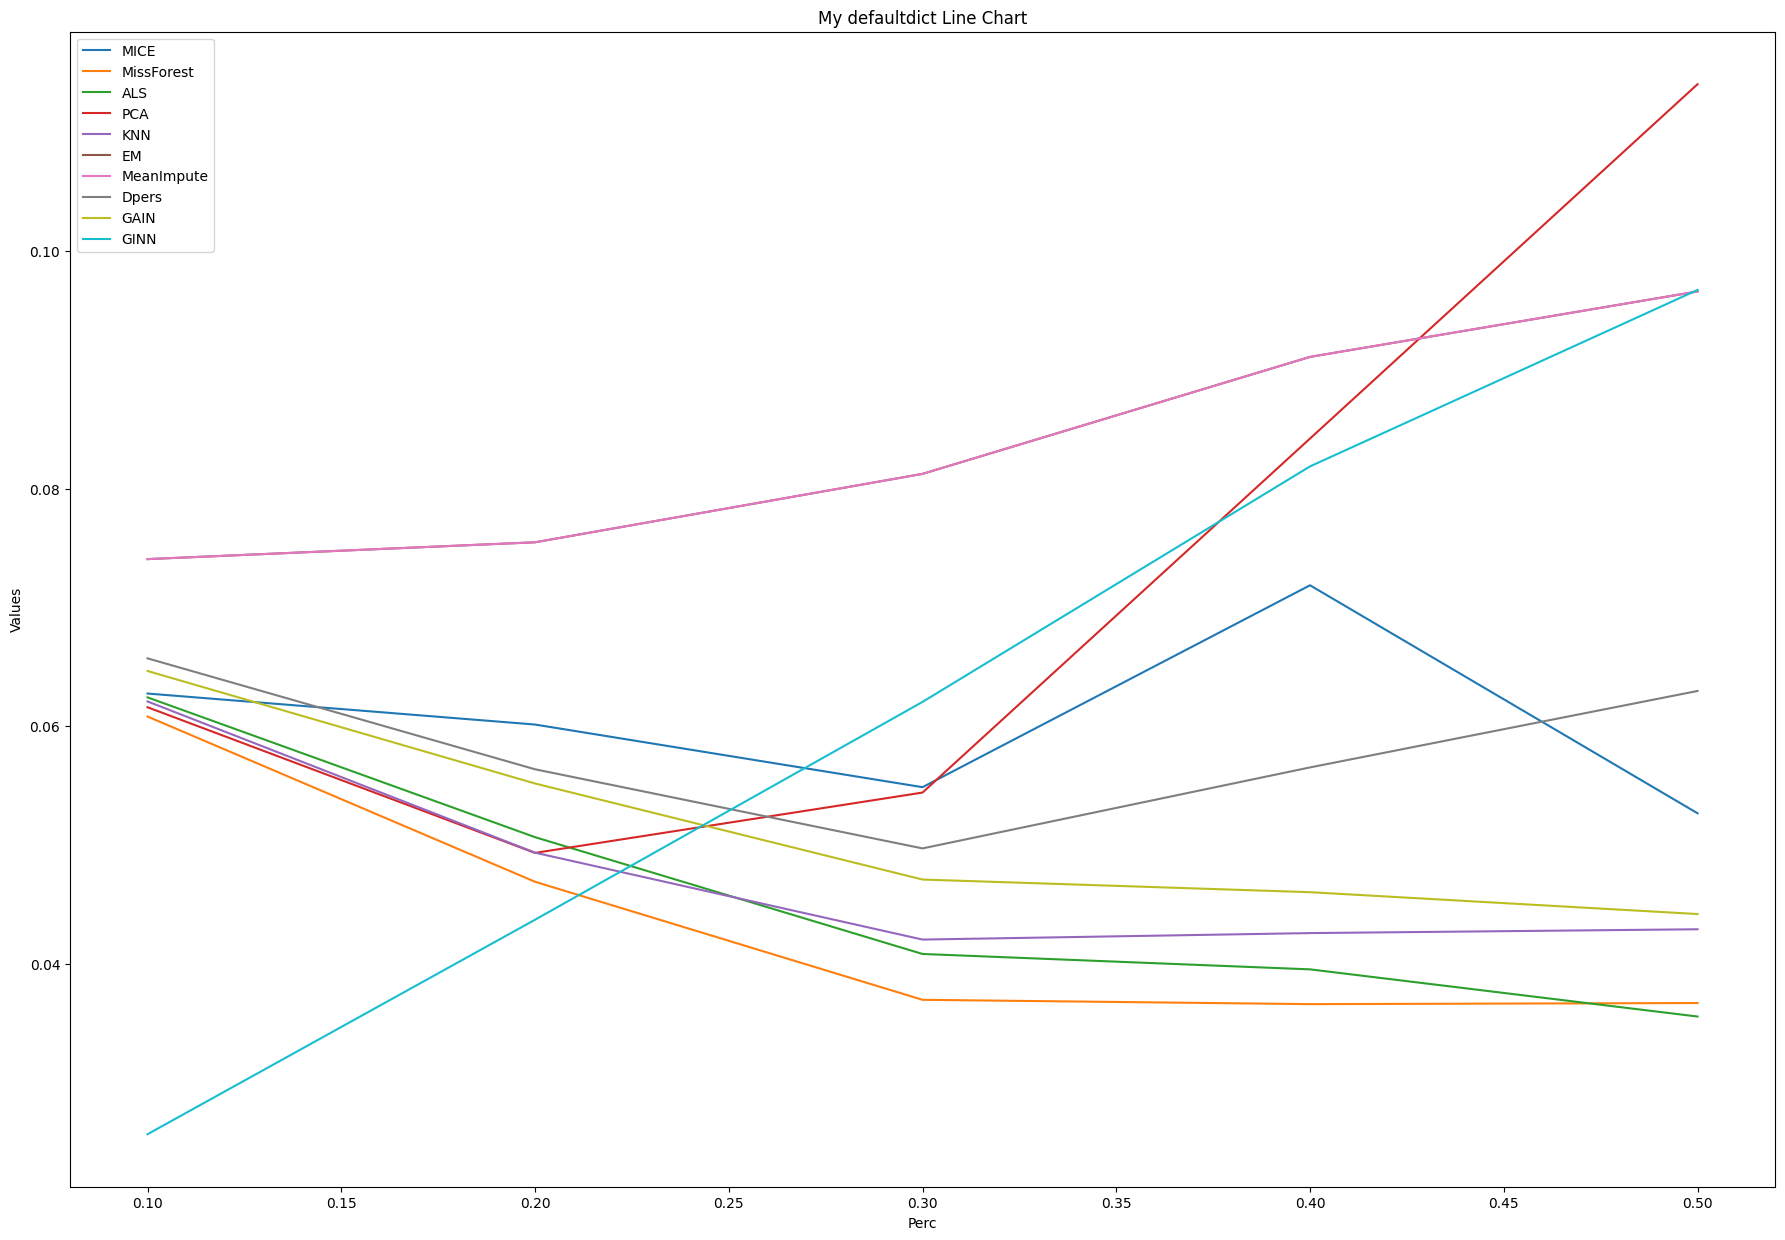

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the columns of element
element = [0.1, 0.2, 0.3, 0.4, 0.5]

# Define the defaultdict object
my_dict = defaultdict(list, {'MICE': [0.06274715694753796, 0.06013600842818266, 0.054858911798457644, 0.07186714380759346, 0.052661853452921854], 
                              'MissForest': [0.0608102790895061, 0.04689117116252394, 0.036948320937777494, 0.03658379961705664, 0.03667626517147212], 
                              'ALS': [0.06242432672168401, 0.05064806844566763, 0.04080973479829263, 0.0395124718944704, 0.035539520370463554], 
                              'PCA': [0.06159275837326011, 0.049323582757281804, 0.05440562945086616, 0.08422706753430262, 0.11407420176383339], 
                              'KNN': [0.06208303442805334, 0.04934216764048792, 0.04202200520193587, 0.04256803738847082, 0.042890105699610256], 
                              'EM': [0.07407085064819727, 0.07548813364017413, 0.08125097862816766, 0.09110368466442392, 0.09661737163587043], 
                              'MeanImpute': [0.07407085064819727, 0.07548813364017413, 0.08125097862816767, 0.09110368466442395, 0.09661737163587043], 
                              'Dpers': [0.06571103379822704, 0.05636700412778132, 0.04970184972778469, 0.05652390675788449, 0.06296335219689767], 
                              'GAIN': [0.06464617362151014, 0.05516974917185815, 0.047079365209201626, 0.046013613558542374, 0.04417303221091847], 
                              'GINN': [0.025625275227972876, 0.043693376926732745, 0.06204321877476836, 0.08188046975106035, 0.09674509524841306]})

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(22, 15))

# Loop through each key and value in the dictionary
for key, value in my_dict.items():
    # Plot the line chart
    ax.plot(element, value, label=key)

# Add x-axis and y-axis labels
ax.set_xlabel('Perc')
ax.set_ylabel('Values')

# Add a title
ax.set_title('My defaultdict Line Chart')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
import random
def degrade_dataset(X, missingness, rand, v):
    """
    Inputs:
        dataset to corrupt
        % of data to eliminate[0,1]
        rand random state
        replace with = 'zero' or 'nan'
      Outputs:
        corrupted Dataset 
        binary mask
    """
    np.random.seed(123)
    X_1d = X.flatten()
    n = len(X_1d)
    mask_1d = np.ones(n)

    corrupt_ids = random.sample(range(n), int(missingness * n))
    for i in corrupt_ids:
        X_1d[i] = v
        mask_1d[i] = 0

    cX = X_1d.reshape(X.shape)
    mask = mask_1d.reshape(X.shape)

    return cX, mask

In [ ]:
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [ ]:
df = apply_normalize(data1)

In [ ]:
x_train = df.iloc[:, :-1].to_numpy() # kh co y
cx_train, cx_train_mask = degrade_dataset(x_train, 0.1,123, np.nan)

In [ ]:
cx_train, cx_train.shape# numpy array bao gom nan, like that (150,4)

(array([[-9.00681170e-01,             nan, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
         -1.31544430e+00],
        [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
         -1.31544430e+00],
        [            nan,  1.24920112e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
         -1.05217993e+00],
        [-1.50652052e+00,             nan, -1.34022653e+00,
         -1.18381211e+00],
        [-1.02184904e+00,             nan,             nan,
         -1.31544430e+00],
        [-1.74885626e+00, -3.62176246e-01,             nan,
                     nan],
        [-1.14301691e+00,             nan, -1.28338910e+00,
                     nan],
        [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
         -1.31544430e+00],
        [-1.26418478e+00,  7.88807586e-01, 

In [ ]:
cx_train_mask, cx_train_mask.shape

(array([[1., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 0., 1.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 1., 1., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1.,